<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [15]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
#Task 1: Become familiar with the dataset
print("The following describes the dataset variables:")
print("CRIM - per capita crime rate by town")
print("ZN - proportion of residential land zoned for lots over 25,000 sq.ft.")
print("INDUS - proportion of non-retail business acres per town.")
print("CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)")
print("NOX - nitric oxides concentration (parts per 10 million)")
print("RM - average number of rooms per dwelling")
print("AGE - proportion of owner-occupied units built prior to 1940")
print("DIS - weighted distances to five Boston employment centres")
print("RAD - index of accessibility to radial highways")
print("TAX - full-value property-tax rate per $10,000")
print("PTRATIO - pupil-teacher ratio by town")
print("LSTAT - % lower status of the population")
print("MEDV - Median value of owner-occupied homes in $1000's")

boston_df.head()

The following describes the dataset variables:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Task 2
For the Median value of owner-occupied homes provide a boxplot


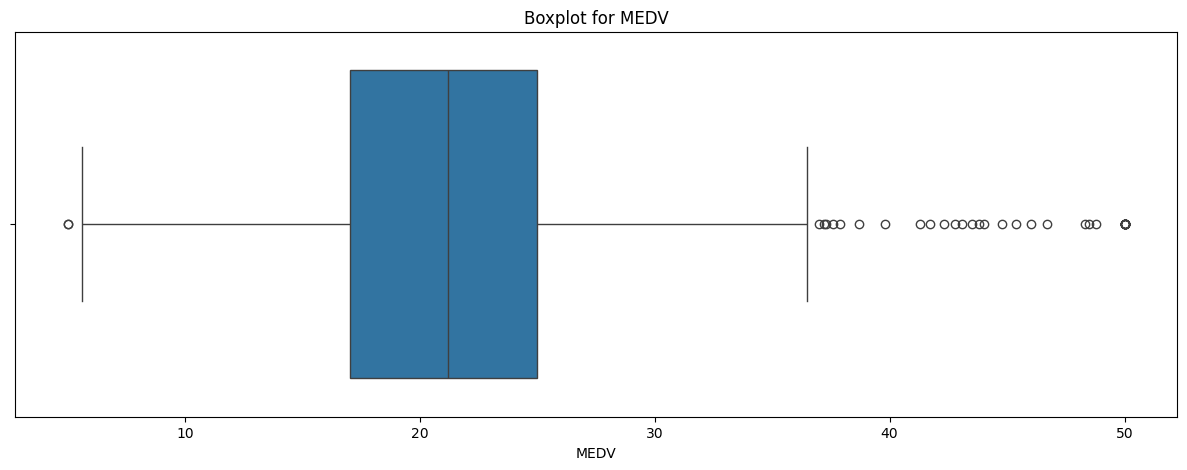

In [7]:
print("Task 2")
print("For the Median value of owner-occupied homes provide a boxplot")
pyplot.figure(figsize=(15,5))
sns.boxplot(x=boston_df.MEDV)
pyplot.title("Boxplot for MEDV")
pyplot.show()

Task 2
Provide a  bar plot for the Charles river variable


<ipython-input-8-9e9f2462c965>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.CHAS,bins=10, kde=False)


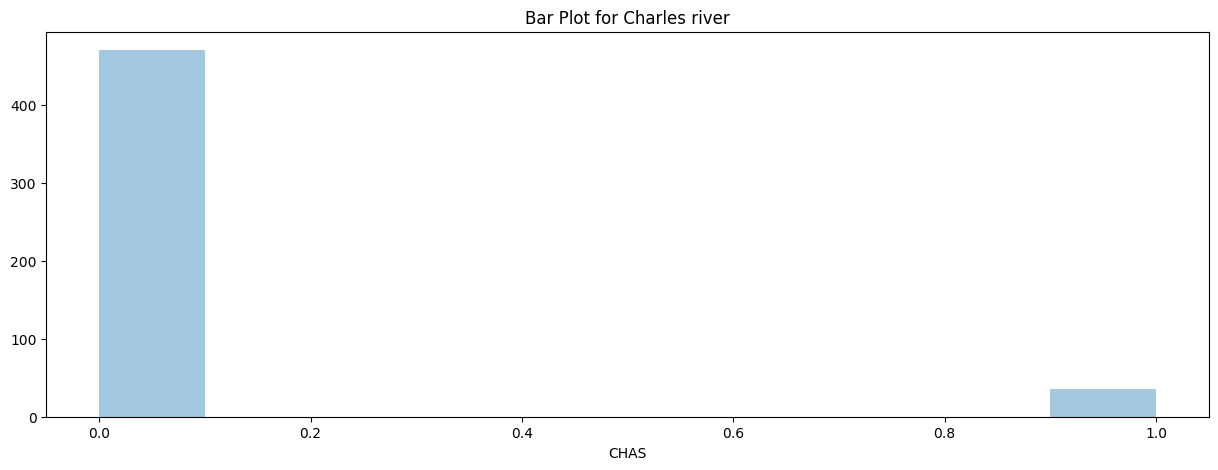

In [8]:
print("Task 2")
print("Provide a  bar plot for the Charles river variable")
pyplot.figure(figsize=(15,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
pyplot.title("Bar Plot for Charles river")
pyplot.show()

Task 2
Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


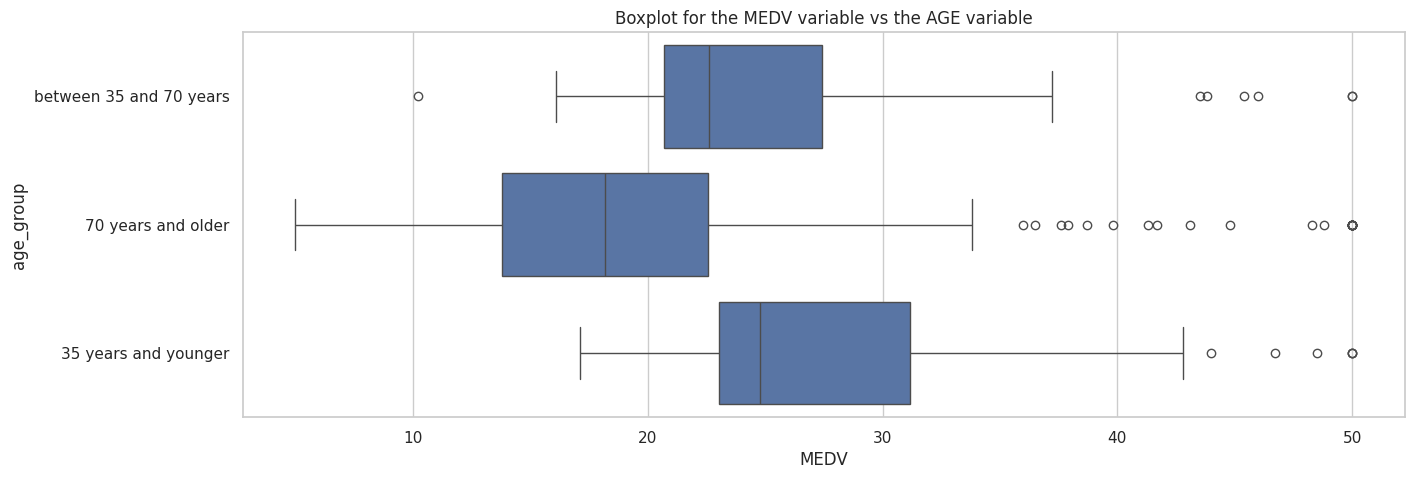

In [18]:
print("Task 2")
print("Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)")
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'
pyplot.figure(figsize=(15,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
pyplot.title("Boxplot for the MEDV variable vs the AGE variable")
pyplot.show()

Task 2
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


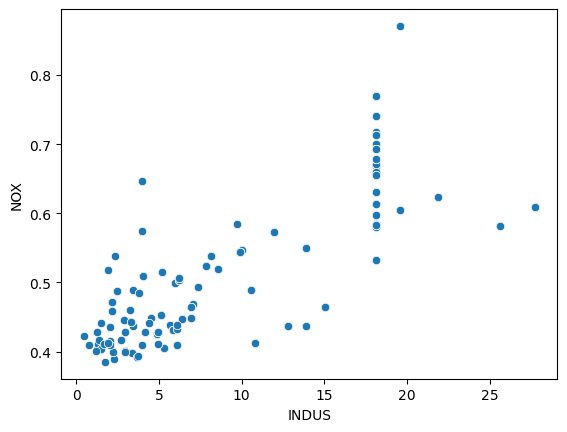

There is a positive correlation between non-retail business acres and Nitric Oxide concentrations. This is an exponential graph.


In [9]:
print("Task 2")
print("Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?")

ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.show()

print("There is a positive correlation between non-retail business acres and Nitric Oxide concentrations. This is an exponential graph.")

Task 2
Create a histogram for the pupil to teacher ratio variable


<ipython-input-12-3fce68f6cbc1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)


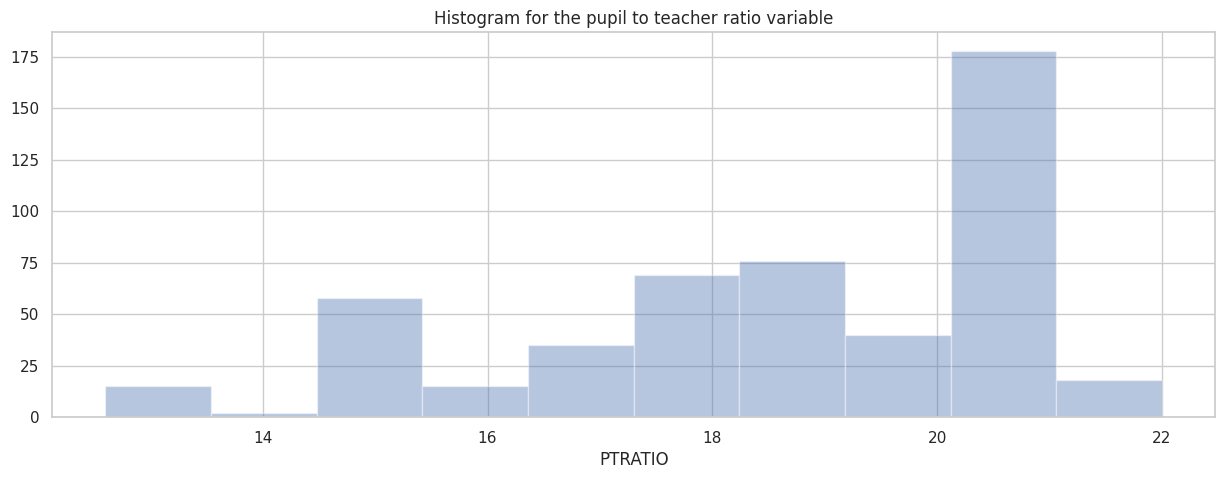

In [12]:
print("Task 2")
print("Create a histogram for the pupil to teacher ratio variable")

pyplot.figure(figsize=(15,5))
sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)
pyplot.title("Histogram for the pupil to teacher ratio variable")
pyplot.show()

In [19]:
print("Task 3")
print("Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)")
print("H0: There is no significant difference in median value of houses bounded by the Charles river.")
print("H1: There is a positive correlation between the median value of houses bounded by Charles river.")

bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = scipy.ttest_ind(bounded, not_bounded)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha/2:
    print("Reject the null hypothesis: There is a positive correlation between the median value of houses bounded by Charles river.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Task 3
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
H0: There is no significant difference in median value of houses bounded by the Charles river.
H1: There is a positive correlation between the median value of houses bounded by Charles river.
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a positive correlation between the median value of houses bounded by Charles river.


In [21]:
print("Task 3")
print("Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)")
print("H0: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940.")
print("H1: There is a positive correlation difference in Median values of houses for each proportion of owner occupied units built prior to 1940")


age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 and younger', 'Between 35 and 70', '70 and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

f_statistic, p_value = scipy.f_oneway(*[group['MEDV'] for name, group in boston_df.groupby('Age_Group')])

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a positive correlation difference in Median values of houses for each proportion of owner occupied units built prior to 1940")
else:
    print("Fail to reject the null hypothesis: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940.")

Task 3
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
H0: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940.
H1: There is a positive correlation difference in Median values of houses for each proportion of owner occupied units built prior to 1940


<ipython-input-21-2f83bf79749b>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_statistic, p_value = scipy.f_oneway(*[group['MEDV'] for name, group in boston_df.groupby('Age_Group')])


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a positive correlation difference in Median values of houses for each proportion of owner occupied units built prior to 1940


In [23]:
print("Task 3")
print("Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)")
print("H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
print("H1: There is a positive correlation relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

corr_coefficient, p_value = scipy.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a positive correlation relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
else:
    print("There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

Task 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
H1: There is a positive correlation relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a positive correlation relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [27]:
print("Task 3")
print("What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)")
print("H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
print("H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")

X = boston_df[['DIS']]  # Weighted distance
y = boston_df['MEDV']   # Median value of owner-occupied homes

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

print("Conclusion: The p value is less than 0.05, so we reject null hypothesis, suggesting a correlation between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")

Task 3
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        11:13:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.